In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

import sys
sys.path.append('../')

from my_utils.regression_eval_plots import EvaluationPlots
from my_utils.custom_linear_regression import CustomLinearRegression

---

# <center> The diabetes dataset </center>

In [2]:

data = load_diabetes(as_frame=True)

features = data.data
target = data.target

print(data.DESCR)
print('-'*100)
print(features.shape)
print(target.shape)
print('-'*100)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
features.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
pd.set_option('display.float_format', '{:.3f}'.format)

features.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136


---

# <center> Compare the custom linear regression class with other models </center>

I will be comparing this custom-made class with 2 other models:
1. Standard ordinary least squares from sklearn
2. Ridge regression

In [5]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test  = train_test_split(features, target, test_size=0.3, random_state=42, shuffle=True)

scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [6]:
# The custom Linear Regression class
lr_custom = CustomLinearRegression( number_of_iterations=5000, learning_rate=0.05,
                                    regularize=True, regularization_strength=0.1).fit(X_train, y_train)
predictions_custom = lr_custom.predict(X_test)


# Standard Linear Regression as a base model 
lr_ols = LinearRegression().fit(X_train, y_train)
predictions_base = lr_ols.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=5).fit(X_train, y_train)
predictions_ridge = ridge.predict(X_test)

Early stopping at iteration: 2697 due to ΔCost being less 0.001


In [7]:
# Mean Squared Errors
mse_custom = mean_squared_error(y_test, predictions_custom)
mse_ols = mean_squared_error(y_test, predictions_base)
mse_ridge = mean_squared_error(y_test, predictions_ridge)

# --------------------------------------------------------------------------------------------------------

#  R2 scores
r2_custom = r2_score(y_test, predictions_custom)
r2_ols = r2_score(y_test, predictions_base)
r2_ridge = r2_score(y_test, predictions_ridge)


# --------------------------------------------------------------------------------------------------------

# Mean Absolute Value scores
mae_custom = mean_absolute_error(y_test, predictions_custom)
mae_ols = mean_absolute_error(y_test, predictions_base)
mae_ridge = mean_absolute_error(y_test, predictions_ridge)


In [8]:
mse_scores = [mse_custom, mse_ols, mse_ridge]
r2_scores = [r2_custom, r2_ols, r2_ridge]
mae_scores = [mae_custom, mae_ols, mae_ridge]
labels = ['Custom', 'OLS', 'Ridge']

pd.DataFrame(index=labels, data={'MSE scores': mse_scores, 'R2 scores': r2_scores, 'MAE scores': mae_scores})

,MSE scores,R2 scores,MAE scores
Custom,2821.556,0.477,41.884
OLS,2821.751,0.477,41.919
Ridge,2819.486,0.478,41.856


---

# <center> Evaluation plots for all models </center>

### &emsp; Calculate residuals

In [9]:
residuals_custom = y_test - predictions_custom
residuals_ols = y_test - predictions_base
residuals_ridge = y_test - predictions_ridge

### &emsp; Plot 

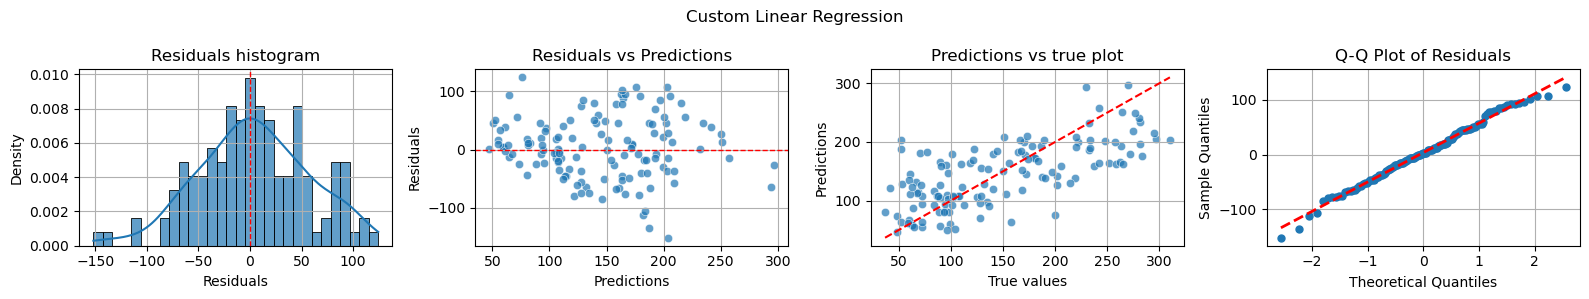

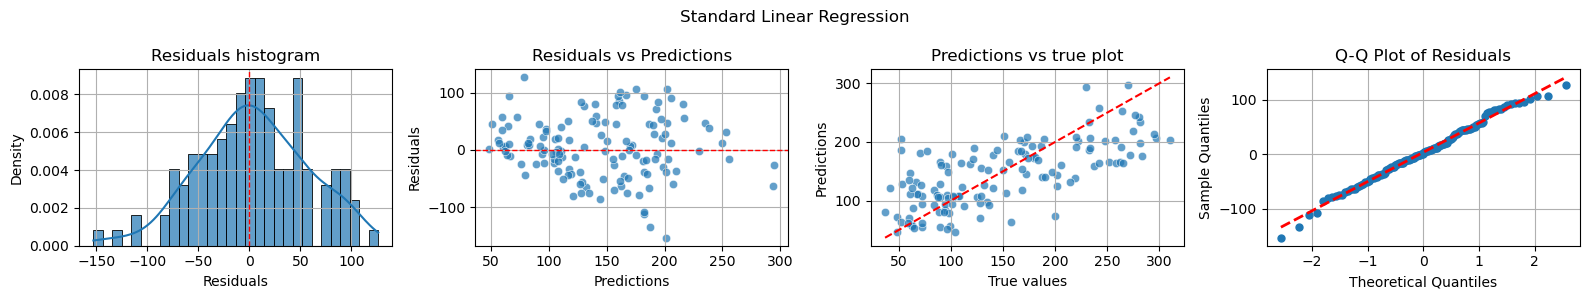

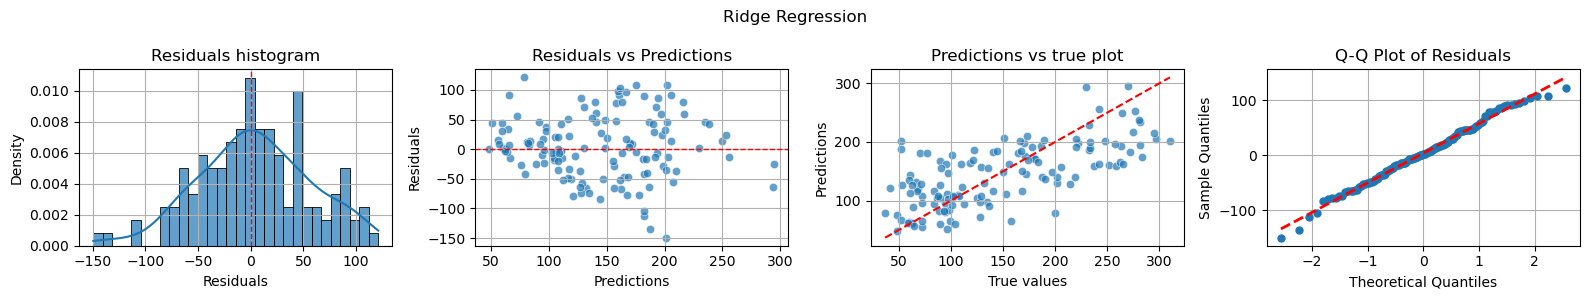

In [10]:
# CustomLinearRegression plots

figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3))
figure.suptitle('Custom Linear Regression')

EvaluationPlots.plot_residuals_histogram(residuals_custom, bins=30, ax=axes[0])
EvaluationPlots.plot_residuals_vs_predictions(predictions_custom, residuals_custom, ax=axes[1])
EvaluationPlots.plot_predictions_vs_true(y_test, predictions_custom, ax=axes[2])
EvaluationPlots.plot_qq(residuals_custom, ax=axes[3])

figure.tight_layout()

# --------------------------------------------------------------------------------------------------------

# Standard linear regression plots

figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3))
figure.suptitle('Standard Linear Regression')

EvaluationPlots.plot_residuals_histogram(residuals_ols, bins=30, ax=axes[0])
EvaluationPlots.plot_residuals_vs_predictions(predictions_ridge, residuals_ols, ax=axes[1])
EvaluationPlots.plot_predictions_vs_true(y_test, predictions_base, ax=axes[2])
EvaluationPlots.plot_qq(residuals_ols, ax=axes[3])

figure.tight_layout()

# --------------------------------------------------------------------------------------------------------

# Ridge regression plots

figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3))
figure.suptitle('Ridge Regression')

EvaluationPlots.plot_residuals_histogram(residuals_ridge, bins=30, ax=axes[0])
EvaluationPlots.plot_residuals_vs_predictions(predictions_ridge, residuals_ridge, ax=axes[1])
EvaluationPlots.plot_predictions_vs_true(y_test, predictions_ridge, ax=axes[2])
EvaluationPlots.plot_qq(residuals_ridge, ax=axes[3])

figure.tight_layout()

---